<a href="https://colab.research.google.com/github/YoonieJang/CS481_Intelligence-Text-Analysis/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore NLTK

In [ ]:
# import packages
import nltk
import pandas as pd
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import brown
from matplotlib import pyplot as plt
plt.style.use('default')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import numpy as np

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Part 1: explore the basic statistics of the Brown corpora
- Please refer to notes in lec 03: https://github.com/iit-cs481/main/blob/main/Lectures/Lec_03/Lec_03_Text%20corpora..ipynb

### Quiz(2)-Q2: 
You have picked one category of the Brown corpus as provided in Quiz(2)-Q1, please print the total number of words for this category


In [ ]:
print("Total number of words:", len(brown.words(categories = 'romance')))

Total number of words: 70022


### Quiz(2)-Q3: 
please build a vocabulary for this corpus and print the number of word types (i.e., the number of words in the vocabulary)
    - note: the vocabulary should only contain words that are composed of alphabet letters (no punctuations), you can use the .isalpha() funtcion to check

In [ ]:
rmc = brown.words(categories = 'romance')
rmc_vocab = sorted(set(word.lower() for word in rmc))
rmc_types = len(rmc_vocab)
print("Total number of word types:", rmc_types)

Total number of word types: 7883


### Quiz(2)-Q4: 
please calculate the lexical diversity score


In [ ]:
rmc_types = len(rmc_vocab)
rmc_tokens = len(rmc)
rmc_lexical_diversity = rmc_types/rmc_tokens

print("lexical diversity:", rmc_lexical_diversity)

lexical diversity: 0.11257890377309988


### Quiz(2)-Q5: 
please sort the words by frequency, print the 90th to 100th most frequently used words.
    - e.g., word_list[90:100]


In [ ]:
def get_word_frequency():
    """
    Calculate words' frequency and rank words by frequency descending order
    """
    word_freq = {}

    for word in rmc: # , 'editorial', 'reviews'
        if(word.isalpha()): # check if a word only include alphabet letters
            if(word not in word_freq):
                word_freq[word] = 1
            else:
                word_freq[word] += 1

    # sort in frequency descending order
    sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
    
    return sorted_word_freq

sorted_word_freq = get_word_frequency()

def display_freq_words(sorted_word_freq, topn, below):
    """
    display topn most frequent words 
    """
    word_freq_topn = sorted_word_freq[topn:below] 

    df_brown_topn = pd.DataFrame({'word': [word for word, freq in word_freq_topn],
                       'frequency': [freq for word, freq in word_freq_topn],
                       'rank': range(topn,below)})
                                  
    df_brown_topn['frequency*rank'] = df_brown_topn['frequency']*df_brown_topn['rank']

    return df_brown_topn

df_brown_topn = display_freq_words(sorted_word_freq, topn=89,below=99)

print("The 90th to 100th words most frequently used:\n", df_brown_topn['word'])

The 90th to 100th words most frequently used:
 0      eyes
1        go
2      came
3       see
4       can
5       old
6      come
7      even
8       are
9    looked
Name: word, dtype: object


### Please print a table to show: (word, frequency, rank, frequency\*rank) for your dataset
    - Refer to the format in the 1st table of "Zipf's law"

In [ ]:
df_brown_tt = display_freq_words(sorted_word_freq, topn=0,below=len(sorted_word_freq))
display(df_brown_tt)

,word,frequency,rank,frequency*rank
0,the,2758,0,0
1,and,1776,1,1776
2,to,1502,2,3004
3,a,1335,3,4005
4,of,1186,4,4744
...,...,...,...,...
7844,forefinger,1,7844,7844
7845,burly,1,7845,7845
7846,decked,1,7846,7846
7847,expect,1,7847,7847


### Please plot the relationship between word rank and frequency:
    - there should be two lines in the plot;
    - one line is ploted as: x-axis: log(rank); y-axis: log(frequency);
    - the other line is plotted as: x-axis: log(rank); y-axis: log(1/rank);
    - Refer to the plot in lec 03 "Relationship between word rank and frequency (Logarithmic)"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


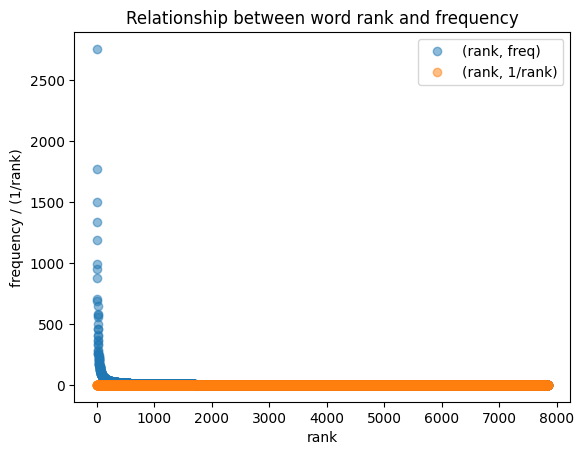

In [ ]:
df_brown_topn = display_freq_words(sorted_word_freq, topn= 0,below = len(sorted_word_freq))
plt.plot(df_brown_topn['rank'].values, df_brown_topn['frequency'].values, 'o', label='(rank, freq)',alpha=0.5)
plt.plot(df_brown_topn['rank'].values, [1/v for v in df_brown_topn['rank'].values], 'o', label='(rank, 1/rank)',alpha=0.5)
plt.xlabel('rank')
plt.ylabel('frequency / (1/rank)')
plt.title("Relationship between word rank and frequency")
plt.legend()

## Part2: Explore Wordnet
- Please refer to notes in lec_04: https://github.com/iit-cs481/main/blob/main/Lectures/Lec_04/Lec_04_Lexical%20resources.ipynb


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Please print the synsets of 'dog'


In [ ]:
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

### Please print the definition of the first synset of 'dog'


In [ ]:
print(wn.synset('dog.n.01').definition()) 

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds


### Please print the example usage of the first synset


In [ ]:
print(wn.synset('dog.n.01').examples())

['the dog barked all night']


### Please print the list of lemmas of the first synset


In [ ]:
wn.synset('dog.n.01').lemmas()

[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

### Please print the synonyms of the word 'dog'
    - print in the format of: synset, list of lemma names
    - refer to the format in lec 04 "Synonyms"

In [ ]:
word_synonyms=[]
print("synonyms of the word 'dog':\n")
for syn in wn.synsets("dog"):
    print(syn, syn.lemma_names())

synonyms of the word 'dog':

Synset('dog.n.01') ['dog', 'domestic_dog', 'Canis_familiaris']
Synset('frump.n.01') ['frump', 'dog']
Synset('dog.n.03') ['dog']
Synset('cad.n.01') ['cad', 'bounder', 'blackguard', 'dog', 'hound', 'heel']
Synset('frank.n.02') ['frank', 'frankfurter', 'hotdog', 'hot_dog', 'dog', 'wiener', 'wienerwurst', 'weenie']
Synset('pawl.n.01') ['pawl', 'detent', 'click', 'dog']
Synset('andiron.n.01') ['andiron', 'firedog', 'dog', 'dog-iron']
Synset('chase.v.01') ['chase', 'chase_after', 'trail', 'tail', 'tag', 'give_chase', 'dog', 'go_after', 'track']


### Please print the antonyms of the word 'dog'
    - hint: iterate over each synset of 'dog' and get antonyms for each lemma in each synset
    - refer to the format in lec 04 "Antonyms"
    

In [ ]:
word_antonyms = []

for syn in wn.synsets("dog"): # iterate over the synonym sets of "good"
    for lm in syn.lemmas(): # iterate over each lemma of a given synset
        if lm.antonyms():
            word_antonyms.append(lm.antonyms()[0].name())

print(word_antonyms)

[]


### Please print the semantic similarity between 'dog' and 'cat'
    - Please calculate similarity score using the following two functions
        - path_similarity()
        - wup_similarity()

In [ ]:
cat = wn.synsets('cat')[0]
dog = wn.synsets('dog')[0]
cat.path_similarity(dog)

0.2

In [ ]:
cat.wup_similarity(dog)

0.8571428571428571